<a href="https://colab.research.google.com/github/AbhayMudgal/MINST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as K
from google.colab import files
from keras.preprocessing import image

mnist = K.datasets.fashion_mnist

In [ ]:
class myCallback(K.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('acc')>0.9):
      print("90% accuracy reached")
      self.model.stop_training = True


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#print(x_train.shape, x_test.shape) 
x_train_CNN = x_train
x_test_CNN = x_test

x_train_CNN = x_train_CNN.reshape(60000, 28, 28, 1)
x_test_CNN = x_test_CNN.reshape(10000, 28, 28, 1)

In [ ]:
neural_network = K.models.Sequential([
  K.layers.Flatten(input_shape = (28, 28)),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')   
])

CNN = K.models.Sequential([
  K.layers.Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  K.layers.MaxPool2D(2, 2),
  K.layers.Flatten(),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')                       
])

CNN2 = CNN = K.models.Sequential([
  K.layers.Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  K.layers.MaxPool2D(2, 2),
  K.layers.Conv2D(16, (3, 3), activation = 'relu'),
  K.layers.MaxPool2D(2, 2),
  K.layers.Flatten(),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')                       
])

In [ ]:
opt1 = K.optimizers.Adam(lr = 0.1, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)
opt2 = K.optimizers.Adam(lr = 2, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)
opt3 = K.optimizers.Adam(lr = 0.5, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)

In [ ]:
neural_network.compile(optimizer = opt1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN.compile(optimizer = opt1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN2.compile(optimizer = opt1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 2**(epoch / 2))

In [ ]:
history_NN = neural_network.fit(x_train, y_train, epochs = 20, validation_split = 0.1, callback = [lr_schedule], shuffle = True)
plt.plot(history_NN.history['accuracy'], label = 'train')
plt.plot(history_NN.history['val_accuracy'], label = 'validation')
plt.show()

(0.001, 10.0, 0.0, 1.0)

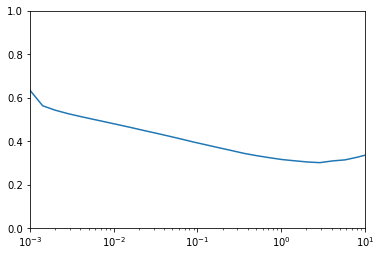

In [ ]:
plt.semilogx(history_NN.history["lr"], history_NN.history["loss"])
plt.axis([1e-3, 1e1, 0, 1])

In [ ]:
history_CNN = CNN.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, callbacks = [lr_schedule], shuffle = True)
plt.plot(history_CNN.history['accuracy'], label = 'train')
plt.plot(history_CNN.history['val_accuracy'], label = 'validation')
plt.show()

(0.001, 10.0, 0.0, 1.0)

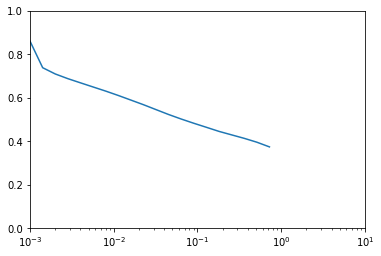

In [ ]:
plt.semilogx(history_CNN.history["lr"], history_CNN.history["loss"])
plt.axis([1e-3, 1e1, 0, 1])

In [ ]:
history_CNN2 = CNN2.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, callbacks = [lr_schedule], shuffle = True)
plt.plot(history_CNN2.history['accuracy'], label = 'train')
plt.plot(history_CNN2.history['val_accuracy'], label = 'validation')
plt.show()

In [ ]:
plt.semilogx(history_CNN2.history["lr"], history_CNN2.history["loss"])
plt.axis([1e-3, 1e1, 0, 1])

In [ ]:

history_NN = neural_network.fit(x_train, y_train, epochs = 20, validation_split = 0.1, shuffle = True)

Epoch 1/20
1688/1688 [==============================] - 7s 2ms/step - loss: 5.6749 - accuracy: 0.7275 - val_loss: 0.5335 - val_accuracy: 0.8023
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5216 - accuracy: 0.8070 - val_loss: 0.5082 - val_accuracy: 0.8102
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4919 - accuracy: 0.8201 - val_loss: 0.4980 - val_accuracy: 0.8138
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4857 - accuracy: 0.8191 - val_loss: 0.4918 - val_accuracy: 0.8187
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4718 - accuracy: 0.8247 - val_loss: 0.4841 - val_accuracy: 0.8198
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4688 - accuracy: 0.8254 - val_loss: 0.4799 - val_accuracy: 0.8200
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4648 - accuracy: 0.8288 - val_loss: 0.4755 - val_accuracy:

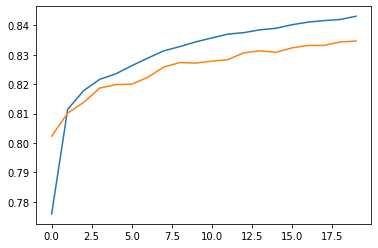

In [ ]:
plt.plot(history_NN.history['accuracy'], label = 'train')
plt.plot(history_NN.history['val_accuracy'], label = 'validation')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 35s 3ms/step - loss: 1.7205 - accuracy: 0.5614 - val_loss: 0.7671 - val_accuracy: 0.7275
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7356 - accuracy: 0.7361 - val_loss: 0.6498 - val_accuracy: 0.7527
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6496 - accuracy: 0.7578 - val_loss: 0.5993 - val_accuracy: 0.7707
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5923 - accuracy: 0.7774 - val_loss: 0.5563 - val_accuracy: 0.7867
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5567 - accuracy: 0.7918 - val_loss: 0.5323 - val_accuracy: 0.7983
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5353 - accuracy: 0.8041 - val_loss: 0.5134 - val_accuracy: 0.8087
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5120 - accuracy: 0.8129 - val_loss: 0.4999 - val_accuracy

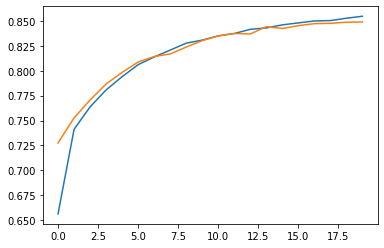

In [ ]:
history_CNN = CNN.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, shuffle = True)
plt.plot(history_CNN.history['accuracy'], label = 'train')
plt.plot(history_CNN.history['val_accuracy'], label = 'validation')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4101 - accuracy: 0.8541 - val_loss: 0.4155 - val_accuracy: 0.8507
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4064 - accuracy: 0.8570 - val_loss: 0.4106 - val_accuracy: 0.8522
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4030 - accuracy: 0.8578 - val_loss: 0.4100 - val_accuracy: 0.8538
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4002 - accuracy: 0.8601 - val_loss: 0.4063 - val_accuracy: 0.8528
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3976 - accuracy: 0.8601 - val_loss: 0.4032 - val_accuracy: 0.8522
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8610 - val_loss: 0.4021 - val_accuracy: 0.8543
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3927 - accuracy: 0.8620 - val_loss: 0.4019 - val_accuracy:

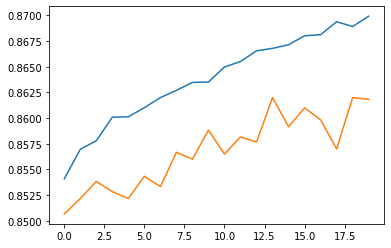

In [ ]:
history_CNN2 = CNN2.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, shuffle = True)
plt.plot(history_CNN2.history['accuracy'], label = 'train')
plt.plot(history_CNN2.history['val_accuracy'], label = 'validation')
plt.show()

In [ ]:

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
